# Introduction

Google colab環境で簡単に実行したい場合は以下をクリック↓

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/Introduction/introduction.ipynb)

## 制御モジュールのインストール

In [1]:
!pip install control

     |████████████████████████████████| 339 kB 11.8 MB/s eta 0:00:01
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=525a5b36e24f8f0748dffb7d9e986194b67d13f749e7b9423605e9b9d3ad770d
  Stored in directory: /home/yoshida/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


## モジュールの読込み

In [2]:
from pylab import *
import control.matlab as matlab
import matplotlib.pyplot as plt
%matplotlib inline

## 係数を定義する

In [3]:
TIME_MAX = 10 # min

V = 10
n = 10
K = 1000
K_1 = 100
a = 100
R_a = 8
J_a = 0.02
D_a = 0.01
K_b = 0.5
K_t = 0.5
N_1 = 25
N_2 = 250
N_3 = 250
J_K = 1
D_L = 1

K_pot = 0.318
K_m = 2.083
a_m = 1.71
K_g = 0.1

## 対象とするシステムの伝達関数を定義する

In [4]:
TF_Potentiometer = matlab.tf([K_pot],[1])
TF_Preamplifer = matlab.tf([K],[1])
TF_PowerAmplifier = matlab.tf([1], [1])
TF_Moter = matlab.tf([K_m], [1, a_m, 0])
TF_Gear = matlab.tf([K_g], [1])

sysPI = TF_Potentiometer\
    *matlab.feedback(TF_Preamplifer*TF_PowerAmplifier*TF_Moter*TF_Gear, 
                     TF_Potentiometer)#If u can not make a closed loop tf, use it
print(sysPI)


       66.24
--------------------
s^2 + 1.71 s + 66.24



## ステップ応答を可視化する

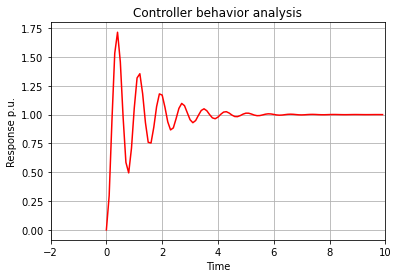

In [5]:
yout, trange = matlab.step(sysPI, arange(0, TIME_MAX, 0.1))
plt.plot(trange, yout, 'r')

plt.xlim([-2,TIME_MAX])
plt.xlabel('Time')
plt.ylabel('Response p.u.')
plt.title('Controller behavior analysis')

plt.grid()
plt.show()

## その他の設計変数を可視化する

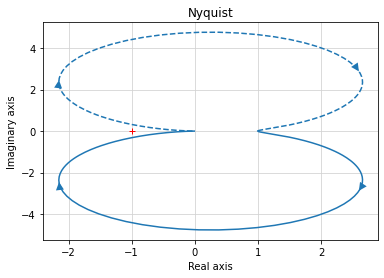

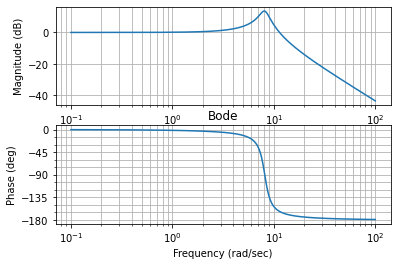

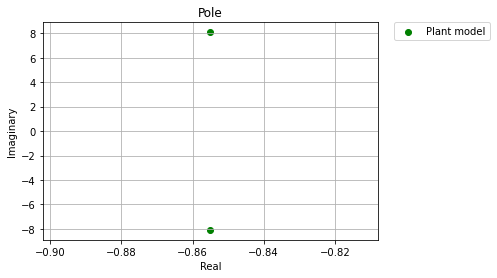

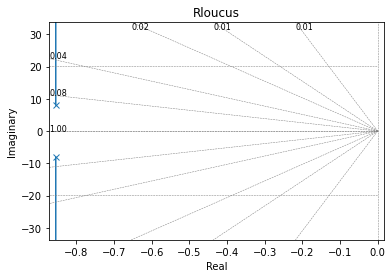

In [6]:
a= matlab.nyquist(sysPI)
plt.title('Nyquist')
plt.show()

a=matlab.bode(sysPI)
plt.title('Bode')
plt.show()

a = matlab.pole(sysPI)

x = []
y = []
for tmp in a:
    x.append(tmp.real)
    y.append(tmp.imag)
plt.scatter(x, y, c="green", marker = "o", label='Plant model')

plt.xlabel("Real")
plt.ylabel("Imaginary")

art = []
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
art.append(lgd)
plt.grid()
plt.title('Pole')
plt.show()

a=matlab.rlocus(sysPI)
plt.title('Rloucus')
plt.show()